<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/TimeSeries_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Line Plots

A line plot is a graphical display that visually represents the correlation between certain variables or changes in data over time using several points, usually ordered in their x-axis value, that are connected by straight line segments. The independent variable is represented in the x-axis while the y-axis represents the data that is changing depending on the x-axis variable, aka the dependent variable.

In [ ]:
import pandas as pd

# Create a list of data to be represented in x-axis
days = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' ,
        'Wednesday' , 'Thursday' , 'Friday' ]

# Create a list of data to be
# represented in y-axis
calories = [ 1670 , 2011 , 1853 , 2557 ,
            1390 , 2118 , 2063 ]

# Create a dataframe using the two lists
df_days_calories = pd.DataFrame(
    { 'day' : days , 'calories' : calories })

df_days_calories

,day,calories
0,Saturday,1670
1,Sunday,2011
2,Monday,1853
3,Tuesday,2557
4,Wednesday,1390
5,Thursday,2118
6,Friday,2063


<Axes: xlabel='day'>

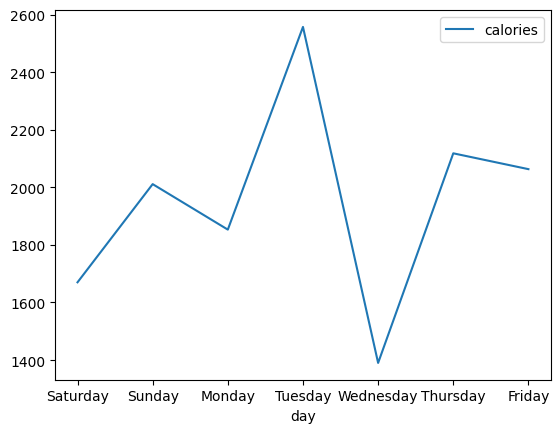

In [ ]:
# use plot() method on the dataframe
df_days_calories.plot( 'day' , 'calories' )

**Seasonality**

Seasonality in time series is recurring and regular patterns at a set interval, which is caused by weather, holidays or business cycles. Ice cream sales usually reach their peak during summer and decrease during winter. Seasonality can happen at any time interval, for instance, daily, weekly or yearly, and can have patterns such as increased weekend sales. Determining these regular patterns is necessary for precise time series forecasting

**Why to Detect Seasonality in Time Series Data?**

*There are certain specific reasons that are discussed below:*

**Pattern Detection:** Identifying seasonality aids analysts in detecting repeating patterns, enhancing data interpretation and future prediction.

**Forecasting:** Proper identification of seasonal trends assists in the development of stable forecasting models, resulting in better predictions.

**Anomaly Detection:** Understanding the seasonal behavior of data allows us to spot anomalies that deviate from expected seasonal trends, signaling important events.

**Optimized Decision-Making:** Recognizing seasonality allows organizations to optimize resources, adjust inventory and fine-tune strategies based on seasonal demands.


Handling Seasonality in Time Series Data
The easiest way to deal with seasonality is through seasonal differencing. Seasonal differencing eliminates the seasonal effect, thus converting the time series into stationary form, which is mostly necessary for forecasting accurately.

Seasonal differencing is achieved by taking away the data point from the same data point in the previous season. For instance, if you're dealing with monthly data and the seasonality recurs every 12 months, you would take away the current month's data from the data 12 months prior.

This process helps eliminate the cyclical patterns, making the data more suitable for model training. In Python, seasonal differencing can be easily applied using the .diff() method in Pandas, specifying a period (e.g., 12 for monthly data with yearly seasonality).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

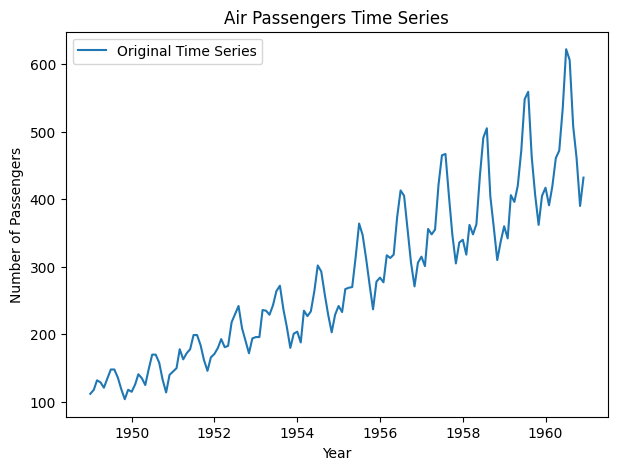

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(7, 5))
plt.plot(data, label='Original Time Series')
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

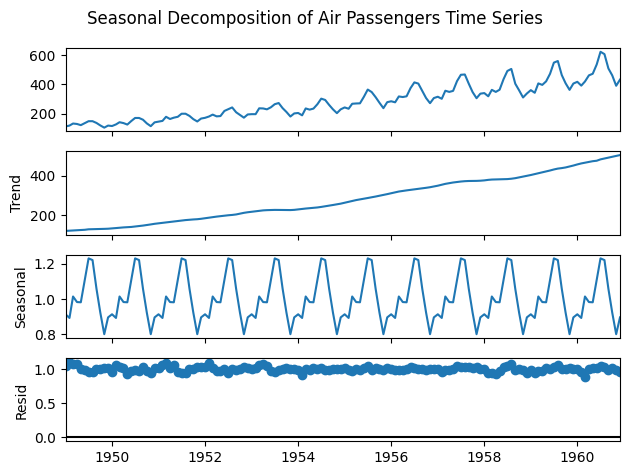

In [ ]:
# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(
    data, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()

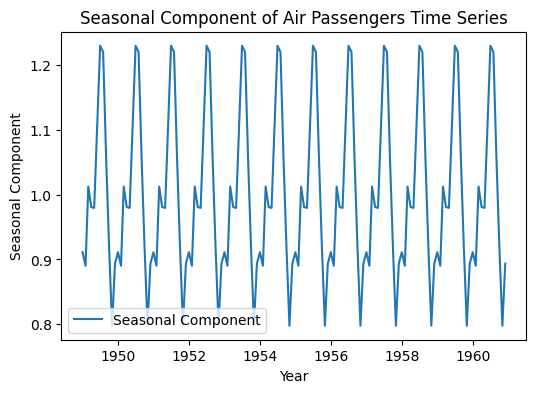

In [ ]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

Removing seasonality from the data
To use a time-series data for various purposes including model training it is required to have a seasonality free time-series data.

Equation:

d(t) = y(t) - y(t - m)

Where:

d (t) is the differenced data point at time t.
y (t) is the value of the series at time t.
y (t - m) is the value of the data point at the previous season.
m is the length of one season (in this case, m = 12 as we have yearly seasonality).
This equation represents seasonal differencing, used to remove the seasonal component from the data.

Here we will visualize how organized it will look after removing the seasonality.

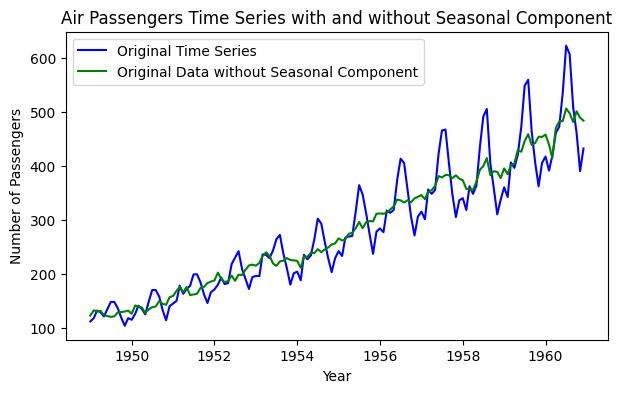

In [ ]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))

# Plot the original time series data
plt.plot(data, label='Original Time Series', color='blue')
data_without_seasonal = data['#Passengers'] / result.seasonal

# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='green')
plt.title('Air Passengers Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Once we have eliminated the seasonality from our data, we have to test if the data series has turned stationary. One such method of testing stationarity is by applying the Augmented Dickey-Fuller (ADF) test. The ADF test is used to ascertain if a time series is stationary by conducting a test for the null hypothesis that the series contains a unit root (or is non-stationary).

Here’s how we can perform the ADF test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Perform the ADF test on the de - seasonalized data
adf_result = adfuller(data_without_seasonal)

#Extract and display the test statistics and p - value
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

#Interpreting the results
if adf_result[1] < 0.05 : print("The data is stationary (p-value < 0.05).")
else : print("The data is not stationary (p-value >= 0.05).")

ADF Statistic: 1.1415289777074211
p-value: 0.9955559262862962
The data is not stationary (p-value >= 0.05).


This step is crucial for ensuring that the time-series data is ready for further analysis or forecasting model training.

